In [1]:
import torch
from torchvision import models as md, datasets, transforms
from models import TrainConfig, ClTrainer
import wandb

/home/oliver/miniconda3/envs/neuralstyle/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## A Training Pipeline
This notebook contains a simple training pipeline.<br/>
We use wandb to log progress.

In [2]:
wandb.login()

wandb: Currently logged in as: oliverweissl. Use `wandb login --relogin` to force relogin


True

###  Create Datasets
Please note that most models work on RGB images!

In [4]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Pad(2),  # Our StyleGAN is trained on 32x32 images as such we pad the 28x28 MNIST images.
        transforms.Lambda(lambda x: x.repeat(3, 1, 1))  # Since we use Grayscale images but want RGB we mock the shape here.
    ]
)

# Lets make the train and validation split.
train_ds = datasets.MNIST("./train_data",train=True, transform=transform, download=True)
val_ds = datasets.MNIST("./val_data",train=False, transform=transform, download=True)

/home/oliver/miniconda3/envs/neuralstyle/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /tmp/pip-req-build-lzws6sq3/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
conf = TrainConfig(
    lr=1e-5,  # The learning rate to start with.
    max_lr=1e-2,  # The maximal learning rate for the scheduler.
    batch=64,
    epochs=5,
    model="WideResNet50_2",
    dataset="MNIST"
)

trainer = ClTrainer(
    train_dataset=train_ds,
    val_dataset=val_ds,
    model=md.wide_resnet50_2(),
    criterion=torch.nn.CrossEntropyLoss,
    optimizer=torch.optim.AdamW,
    scheduler=torch.optim.lr_scheduler.OneCycleLR,
    train_config=conf,
    out_features=10,  # Make sure to adapt this according to your data!!
)

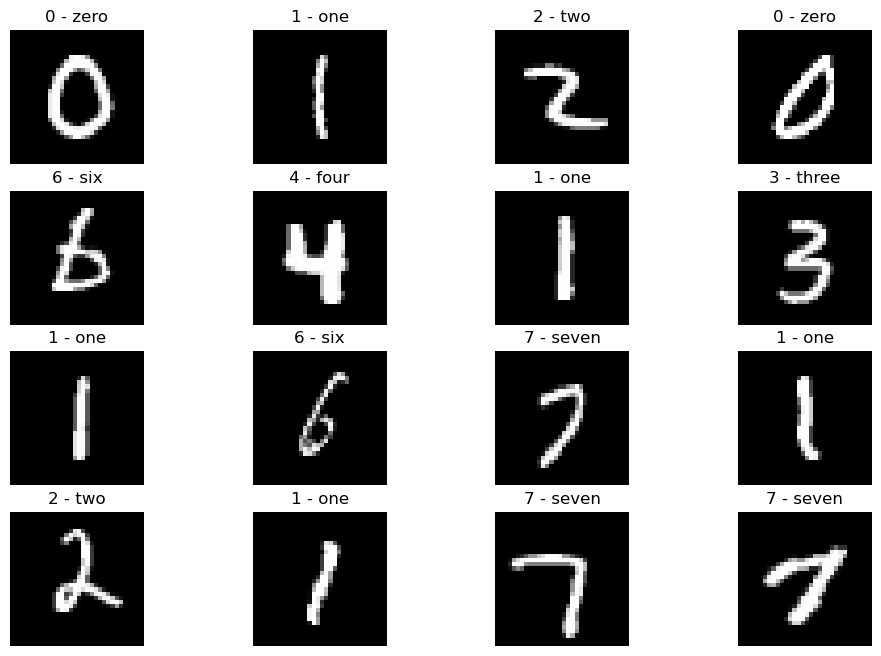

In [7]:
trainer.show_samples()

In [8]:
trainer.train()

100%|██████████| 5/5 [01:34<00:00, 18.98s/it]

Finished Training in 0:01:34.916071!


In [9]:
trainer.save_model("models/wrn_mnist.pkl")